<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/211007%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
from google.colab import files
import io
data = files.upload()

Saving result.csv to result.csv


In [5]:
df = pd.read_csv('result.csv')

In [6]:
train=df.sample(frac=0.8)
test=df.sample(frac=0.2)

In [7]:
mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std

test -= mean
test /= std

In [8]:
train_data_set = train.values
x_train = train_data_set[:, 2:-1].astype(float)
y_train = train_data_set[:, -1].astype(float)

In [9]:
test_data_set = test.values
x_test = test_data_set[:, 2:-1].astype(float)
y_test = test_data_set[:, -1].astype(float)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_dim = 11, activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

In [11]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

In [12]:
hist=model.fit(x_train, y_train, epochs=120, batch_size=32)

Epoch 1/120
26/26 [==============================] - 1s 10ms/step - loss: 0.7027 - mae: 0.6707
Epoch 2/120
26/26 [==============================] - 0s 11ms/step - loss: 0.6032 - mae: 0.6177
Epoch 3/120
26/26 [==============================] - 0s 11ms/step - loss: 0.5947 - mae: 0.6015
Epoch 4/120
26/26 [==============================] - 0s 10ms/step - loss: 0.5547 - mae: 0.5841
Epoch 5/120
26/26 [==============================] - 0s 10ms/step - loss: 0.5665 - mae: 0.5934
Epoch 6/120
26/26 [==============================] - 0s 10ms/step - loss: 0.5382 - mae: 0.5726
Epoch 7/120
26/26 [==============================] - 0s 11ms/step - loss: 0.5430 - mae: 0.5775
Epoch 8/120
26/26 [==============================] - 0s 11ms/step - loss: 0.5334 - mae: 0.5649
Epoch 9/120
26/26 [==============================] - 0s 11ms/step - loss: 0.5029 - mae: 0.5557
Epoch 10/120
26/26 [==============================] - 0s 11ms/step - loss: 0.4842 - mae: 0.5385
Epoch 11/120
26/26 [=============================

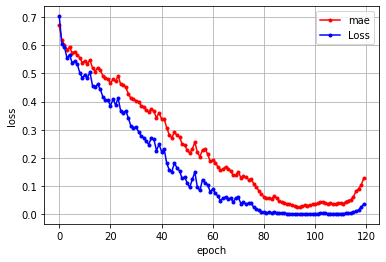

In [14]:
import matplotlib.pyplot as plt

y_acc = hist.history['mae']
y_loss = hist.history['loss']#x_len = np.arange(len(y_loss)) 
x_len = np.arange(120)
plt.plot(x_len, y_acc, marker='.', c='red', label="mae")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [15]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])

## training loss and acc ##
[0.7027474641799927, 0.6031959652900696, 0.594721794128418, 0.5547035932540894, 0.5665457844734192, 0.5382364392280579, 0.5429749488830566, 0.5333656668663025, 0.5028649568557739, 0.4842444956302643, 0.49591565132141113, 0.4851948916912079, 0.5042318105697632, 0.4556419253349304, 0.4515148401260376, 0.4611662030220032, 0.44474712014198303, 0.41785845160484314, 0.40688833594322205, 0.4050419330596924, 0.38543176651000977, 0.4075498580932617, 0.388693630695343, 0.41144275665283203, 0.3673005998134613, 0.3603813350200653, 0.3673885762691498, 0.3417256772518158, 0.31293922662734985, 0.3077707588672638, 0.3087180256843567, 0.29371407628059387, 0.2776827812194824, 0.27187949419021606, 0.25926417112350464, 0.24722690880298615, 0.2723648250102997, 0.2655021846294403, 0.22600525617599487, 0.24879705905914307, 0.2224772423505783, 0.23156403005123138, 0.18151427805423737, 0.15746121108531952, 0.1514558494091034, 0.18172699213027954, 0.16515201330184937, 0.1542984992265

In [16]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

7/7 [==============================] - 0s 4ms/step - loss: 0.1646 - mae: 0.2357
## evaluation loss and_metrics ##
[0.16464664041996002, 0.2357158660888672]


In [17]:
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)
print(y_test[0:1])

## yhat ##
[[-0.3831579]]
[-0.46985209]


In [20]:
xhat = x_test
yhat = model.predict(xhat)

print("======predict======")
print(yhat)


print("======real======")
print(y_test)

======predict======
[[-0.38315803]
 [ 0.14075989]
 [-0.0139888 ]
 [ 0.03877446]
 [-0.55614203]
 [-1.6885016 ]
 [-0.00847028]
 [-0.66832256]
 [ 1.9932091 ]
 [ 1.1705623 ]
 [ 0.66317886]
 [-1.3686486 ]
 [ 0.04180726]
 [-1.6770726 ]
 [-1.4253337 ]
 [ 0.16962151]
 [ 1.5634924 ]
 [ 0.03067538]
 [-1.5956762 ]
 [ 0.47233808]
 [ 0.9020116 ]
 [-1.2567749 ]
 [ 2.2481573 ]
 [ 0.8719667 ]
 [ 0.70600575]
 [-1.6451612 ]
 [-0.37902108]
 [-1.3972641 ]
 [ 1.1014336 ]
 [-1.4457877 ]
 [-0.49882084]
 [ 1.4434899 ]
 [ 1.4030886 ]
 [ 1.3575623 ]
 [-1.7905142 ]
 [ 0.28970504]
 [-1.4595628 ]
 [ 0.67739886]
 [ 0.71228826]
 [-0.9112481 ]
 [ 0.96300614]
 [-0.941618  ]
 [-1.9105281 ]
 [-0.7087729 ]
 [ 0.35698146]
 [-1.7268084 ]
 [ 0.34789217]
 [-0.04484744]
 [ 1.3596399 ]
 [-0.11152287]
 [ 0.44642186]
 [-0.45169705]
 [-1.9498723 ]
 [ 1.2060428 ]
 [-0.47369084]
 [-0.03690689]
 [ 0.42043942]
 [ 1.2900791 ]
 [-0.0588075 ]
 [ 0.5382323 ]
 [ 0.01856804]
 [ 1.0331929 ]
 [ 0.9117177 ]
 [ 0.89940184]
 [-0.159799  ]
 [-1.

<function matplotlib.pyplot.show>

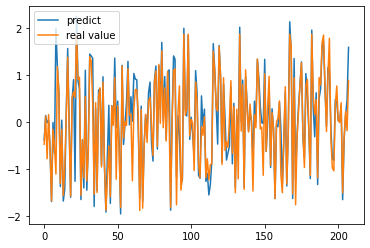

In [31]:
plt.plot(model.predict(x_test),label='predict')
plt.plot(y_test, label='real value')
#plt.plot(model.predict(x_test)-y_test)
plt.xlim(0,50)
plt.legend()
plt.show